In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [5]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [7]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

In [10]:
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
Y = data[["species"]]

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
clf  = RandomForestClassifier(n_estimators=100)

In [16]:
clf.fit(X_train,Y_train)

C:\Users\Dinesh-PC\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
y_pred = clf.predict(X_test)

In [20]:
y_pred

array([1, 0, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 2, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0, 2,
       2])

In [21]:
from sklearn import metrics 

print("Accuracy :",metrics.accuracy_score(Y_test,y_pred))

Accuracy : 0.9333333333333333


In [23]:
clf.predict([[3,4,5,2]])

array([2])

In [28]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)

In [29]:
feature_imp

petal width (cm)     0.495004
petal length (cm)    0.386311
sepal length (cm)    0.086866
sepal width (cm)     0.031819
dtype: float64

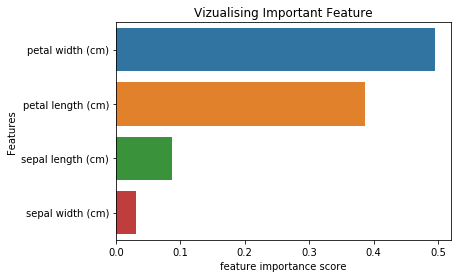

In [33]:
import seaborn as sns

sns.barplot(x= feature_imp,y=feature_imp.index)

plt.xlabel("feature importance score")

plt.ylabel("Features")

plt.title("Vizualising Important Feature")

plt.show()

In [35]:
from sklearn.model_selection import train_test_split
# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"
y=data['species']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5)

In [36]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9428571428571428
